# Olympics Data Analysis (1976–2008)


Sections:
1. Load data
2. Cleaning & preprocessing
3. Exploratory Data Analysis (tables & plots)
4. Simple predictive model (example)


In [2]:
# Imports and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inline (for notebooks)
%matplotlib inline

data_path = "Summer-Olympic-medals-1976-to-2008.csv"
print("Loading:", data_path)
df = pd.read_csv(data_path, encoding='latin1')
df.shape


Loading: Summer-Olympic-medals-1976-to-2008.csv


(15433, 11)

In [3]:
# First look at the data
df.head(10)

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
5,Montreal,1976.0,Aquatics,Diving,10m platform,"LOUGANIS, Gregory",Men,USA,United States,M,Silver
6,Montreal,1976.0,Aquatics,Diving,10m platform,"VAYTSEKHOVSKAYA, Elena",Women,URS,Soviet Union,W,Gold
7,Montreal,1976.0,Aquatics,Diving,3m springboard,"POTTER-MCINGVALE, Cynthia",Women,USA,United States,W,Bronze
8,Montreal,1976.0,Aquatics,Diving,10m platform,"DIBIASI, Klaus",Men,ITA,Italy,M,Gold
9,Montreal,1976.0,Aquatics,Diving,10m platform,"ALEINIK, Vladimir",Men,URS,Soviet Union,M,Bronze


In [4]:
# Data info and missing values
print(df.info())
print('\nMissing values by column:\n', df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB
None

Missing values by column:
 City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64


In [5]:
# Cleaning steps (based on the provided project notes)
df = df.drop(columns=[c for c in ['Event_gender','Country_Code'] if c in df.columns])
# drop fully empty rows (if any)
df = df.dropna(how='all').copy()

# Try to coerce Year to integer (some files have floats)
if 'Year' in df.columns:
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')

# Reset index
df = df.reset_index(drop=True)
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,East Germany,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,Soviet Union,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,United States,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,Italy,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,United States,Bronze


Country
United States     1992
Soviet Union      1021
Australia          798
Germany            691
China              679
Russia             638
East Germany       626
Italy              486
Romania            482
United Kingdom     467
Korea, South       454
France             449
Netherlands        428
Japan              388
Hungary            368
Name: Medal, dtype: int64


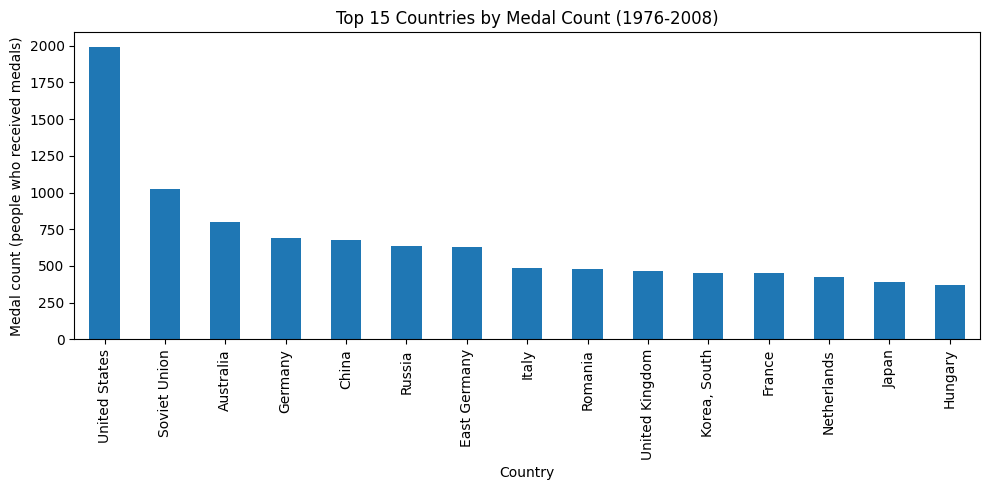

In [6]:
# EDA: Top countries by medal-count (counts people who received medals)
top_countries = df.groupby('Country')['Medal'].count().sort_values(ascending=False).head(15)
print(top_countries)

plt.figure(figsize=(10,5))
top_countries.plot(kind='bar')
plt.title('Top 15 Countries by Medal Count (1976-2008)')
plt.ylabel('Medal count (people who received medals)')
plt.tight_layout()
plt.show()

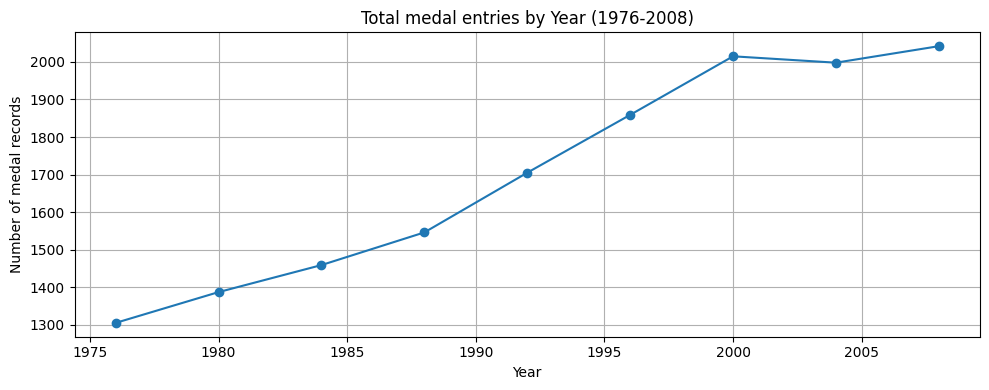

In [7]:
# Medals over years (total medals awarded — i.e., total medal records)
medals_over_years = df.groupby('Year')['Medal'].count()
plt.figure(figsize=(10,4))
medals_over_years.plot(marker='o')
plt.title('Total medal entries by Year (1976-2008)')
plt.xlabel('Year')
plt.ylabel('Number of medal records')
plt.grid(True)
plt.tight_layout()
plt.show()

Gender
Men      9388
Women    5928
Name: count, dtype: int64

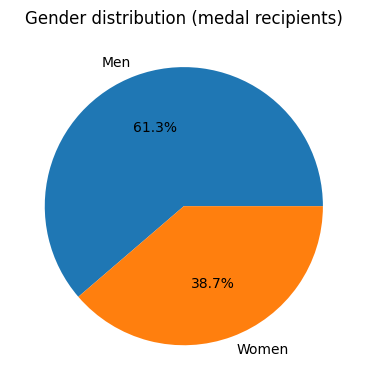

In [8]:
# Gender distribution
if 'Gender' in df.columns:
    display(df['Gender'].value_counts())
    plt.figure(figsize=(6,4))
    df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', ylabel='')
    plt.title('Gender distribution (medal recipients)')
    plt.tight_layout()
    plt.show()
else:
    print('No Gender column found.')

In [9]:
# Top athletes by medal count
top_athletes = df.groupby('Athlete')['Medal'].count().sort_values(ascending=False).head(15)
top_athletes

Athlete
PHELPS, Michael           16
FISCHER, Birgit           12
TORRES, Dara              12
THOMPSON, Jenny           12
ANDRIANOV, Nikolay        12
NEMOV, Alexei             12
BIONDI, Matthew           11
COUGHLIN, Natalie         11
LEWIS, Carl               10
SCHERBO, Vitaly           10
DITYATIN, Aleksandr       10
VAN ALMSICK, Franziska    10
HALL, Gary Jr.            10
THORPE, Ian                9
OTTEY-PAGE, Merlene        9
Name: Medal, dtype: int64

In [10]:
# Which country dominated each sport (top 3 per sport by medal-records)
sport_country = df.groupby(['Sport','Country'])['Medal'].count().reset_index(name='Count')
top3_by_sport = sport_country.sort_values(['Sport','Count'], ascending=[True, False]).groupby('Sport').head(3)
top3_by_sport.head(40)

,Sport,Country,Count
43,Aquatics,United States,578
1,Aquatics,Australia,239
28,Aquatics,Russia,125
56,Archery,"Korea, South",52
67,Archery,United States,19
49,Archery,China,15
142,Athletics,United States,299
128,Athletics,Soviet Union,115
90,Athletics,East Germany,107
145,Badminton,China,47


## Simple predictive example — predict Gold vs non-Gold


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df_ml = df.copy()
# create binary target: Gold=1, else=0
df_ml = df_ml[df_ml['Medal'].notnull()].copy()
df_ml['is_gold'] = (df_ml['Medal'].str.strip().str.lower() == 'gold').astype(int)

# Use simple categorical features: Sport, Gender, Country (label encoded)
features = ['Sport']
if 'Gender' in df_ml.columns:
    features.append('Gender')
if 'Country' in df_ml.columns:
    features.append('Country')

# Drop rows with missing features
df_ml = df_ml.dropna(subset=features + ['is_gold'])

# Label encode each categorical column separately (simple approach)
X = pd.DataFrame()
for col in features:
    X[col] = LabelEncoder().fit_transform(df_ml[col].astype(str))
y = df_ml['is_gold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.6709323583180987

Classification report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      2569
           1       0.00      0.00      0.00      1260

    accuracy                           0.67      3829
   macro avg       0.34      0.50      0.40      3829
weighted avg       0.45      0.67      0.54      3829



C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classif

In [13]:
# Save a cleaned version (optional) to /mnt/data for reuse
clean_path = 'olympics_cleaned_for_notebook.csv'
df.to_csv(clean_path, index=False)
print('Saved cleaned CSV to', clean_path)

Saved cleaned CSV to olympics_cleaned_for_notebook.csv
